## compare between trained models (according to sleap docs)

In [1]:
# only need to run on first creation on conda env 
!pip uninstall -qqq -y opencv-python opencv-contrib-python
!pip install -qqq "sleap[pypi]>=1.3.3"
!pip install tree


ERROR: Cannot uninstall opencv-python 4.5.5, RECORD file not found. Hint: The package was installed by conda.


In [1]:
import os
import sleap
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use("seaborn-deep")
sleap.versions()

c:\Users\esay\.conda\envs\sleap_v2\lib\site-packages\shiboken2\files.dir\shibokensupport\signature\parser.py:191: RuntimeWarning: pyside_type_init:

        UNRECOGNIZED:   'PySide2.QtCore.QString'
        OFFENDING LINE: 'PySide2.QtWidgets.QFileDialog.getOpenFileName(parent:PySide2.QtWidgets.QWidget=nullptr,caption:QString=QString(),dir:QString=QString(),filter:QString=QString(),selectedFilter:PySide2.QtCore.QString=QString(),options:PySide2.QtWidgets.QFileDialog.Options=QFileDialog.Options())->QString'
        
  """.format(thing, line), RuntimeWarning)
c:\Users\esay\.conda\envs\sleap_v2\lib\site-packages\shiboken2\files.dir\shibokensupport\signature\parser.py:191: RuntimeWarning: pyside_type_init:

        UNRECOGNIZED:   'PySide2.QtCore.QString'
        OFFENDING LINE: 'PySide2.QtWidgets.QFileDialog.getOpenFileNames(parent:PySide2.QtWidgets.QWidget=nullptr,caption:QString=QString(),dir:QString=QString(),filter:QString=QString(),selectedFilter:PySide2.QtCore.QString=QString(),option

SLEAP: 1.3.4
TensorFlow: 2.7.0
Numpy: 1.21.6
Python: 3.7.12
OS: Windows-10-10.0.22621-SP0


In [75]:
data_dir = "Z://giocomo/esay/cd_project/behavior/v3_model/models"
# model = "241210_143147.single_instance.n=1794"
# latest_model = "250113_165658.single_instance.n=2844"
# model_dir = os.path.join(data_dir, model)
# latest_dir = os.path.join(data_dir, latest_model)

all_models = [os.path.join(data_dir,p) for p in os.listdir(data_dir)]

all_models

['Z://giocomo/esay/cd_project/behavior/v3_model/models\\241121_162848.single_instance.n=189',
 'Z://giocomo/esay/cd_project/behavior/v3_model/models\\241202_170510.single_instance.n=843',
 'Z://giocomo/esay/cd_project/behavior/v3_model/models\\241203_165358.single_instance.n=1038',
 'Z://giocomo/esay/cd_project/behavior/v3_model/models\\241210_121229.single_instance.n=1429',
 'Z://giocomo/esay/cd_project/behavior/v3_model/models\\241210_134835.single_instance.n=1794',
 'Z://giocomo/esay/cd_project/behavior/v3_model/models\\241210_143147.single_instance.n=1794',
 'Z://giocomo/esay/cd_project/behavior/v3_model/models\\241216_154300.single_instance.n=2411',
 'Z://giocomo/esay/cd_project/behavior/v3_model/models\\241216_161053.single_instance.n=2431',
 'Z://giocomo/esay/cd_project/behavior/v3_model/models\\241217_113811.single_instance.n=2451',
 'Z://giocomo/esay/cd_project/behavior/v3_model/models\\241217_133127.single_instance.n=2451',
 'Z://giocomo/esay/cd_project/behavior/v3_model/mode

In [9]:
!tree {model_dir}

Folder PATH listing for volume groups
Volume serial number is 2CEA-A58F
Z:\GIOCOMO\ESAY\CD_PROJECT\BEHAVIOR\V3_MODEL\MODELS\241210_143147.SINGLE_INSTANCE.N=1794
Invalid path - \GIOCOMO\ESAY\CD_PROJECT\BEHAVIOR\V3_MODEL\MODELS\241210_143147.SINGLE_INSTANCE.N=1794
No subfolders exist 



In [10]:
help(sleap.load_metrics)

Help on function load_metrics in module sleap.nn.evals:

load_metrics(model_path: str, split: str = 'val') -> typing.Dict[str, typing.Any]
    Load metrics for a model.
    
    Args:
        model_path: Path to a model folder or metrics file (.npz).
        split: Name of the split to load the metrics for. Must be `"train"`, `"val"` or
            `"test"` (default: `"val"`). Ignored if a path to a metrics NPZ file is
            provided.
    
    Returns:
        The loaded metrics as a dictionary with keys:
    
        - `"vis.tp"`: Visibility - True Positives
        - `"vis.fp"`: Visibility - False Positives
        - `"vis.tn"`: Visibility - True Negatives
        - `"vis.fn"`: Visibility - False Negatives
        - `"vis.precision"`: Visibility - Precision
        - `"vis.recall"`: Visibility - Recall
        - `"dist.avg"`: Average Distance (ground truth vs prediction)
        - `"dist.p50"`: Distance for 50th percentile
        - `"dist.p75"`: Distance for 75th percentile
  

In [76]:
metrics = sleap.load_metrics(model_dir, split="val")
latest_metrics = sleap.load_metrics(latest_dir, split="val")

all_metrics = pd.DataFrame()
for model in all_models:
    metrics = sleap.load_metrics(model, split = "val")
    metrics['model_name'] = model
    all_metrics = all_metrics.append(metrics,ignore_index=True)

print(all_metrics.head())
# print("\n".join(all_metrics.keys()))

  vis.tp vis.fp vis.tn vis.fn vis.precision          vis.recall  \
0     98      0      0     16           1.0  0.8596491228070176   
1    441      0      0     63           1.0               0.875   
2    556      0      0     68           1.0  0.8910256410256411   
3    762      0      0     96           1.0  0.8881118881118881   
4    910      0      2    162           1.0  0.8488805970149254   

                                     dist.frame_idxs  \
0  [14720, 8160, 8869, 5520, 16935, 12816, 3057, ...   
1  [10157, 14039, 9242, 8160, 1840, 16935, 5718, ...   
2  [14486, 4600, 0, 17252, 13343, 10298, 13342, 8...   
3  [7360, 13206, 11372, 14295, 570, 953, 15248, 8...   
4  [14720, 13385, 4600, 14486, 9200, 10733, 13192...   

                                    dist.video_paths  \
0  [Z:/giocomo/esay/behavior/videos/day1/day1_res...   
1  [Z:/giocomo/esay/behavior/videos/day1/day1_res...   
2  [Z:/giocomo/esay/behavior/videos/day1/day1_res...   
3  [Z:/giocomo/esay/cd_project/behav

In [79]:
all_metrics

,vis.tp,vis.fp,vis.tn,vis.fn,vis.precision,vis.recall,dist.frame_idxs,dist.video_paths,dist.dists,dist.avg,...,pck_voc.match_score_thresholds,pck_voc.recall_thresholds,pck_voc.match_scores,pck_voc.precisions,pck_voc.recalls,pck_voc.AP,pck_voc.AR,pck_voc.mAP,pck_voc.mAR,model_name
0,98,0,0,16,1.0,0.8596491228070176,"[14720, 8160, 8869, 5520, 16935, 12816, 3057, ...",[Z:/giocomo/esay/behavior/videos/day1/day1_res...,"[[5.5048705408870395, 15.800820200373172, 1.43...",13.810212,...,"[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.44999999999999996, 0.75, 0.7500000000000001...","[[0.7272727272727273, 0.7272727272727273, 0.72...","[0.42105263157894735, 0.2631578947368421, 0.21...","[0.30963096309630966, 0.14461446144614462, 0.1...","[0.42105263157894735, 0.2631578947368421, 0.21...",0.081794,0.131579,Z://giocomo/esay/cd_project/behavior/v3_model/...
1,441,0,0,63,1.0,0.875,"[10157, 14039, 9242, 8160, 1840, 16935, 5718, ...",[Z:/giocomo/esay/behavior/videos/day1/day1_res...,"[[0.2323645693392265, 4.249441789071201, 2.307...",10.565143,...,"[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.4666666666666666, 0.7833333333333333, 0.733...","[[0.9032258064516129, 0.9032258064516129, 0.90...","[0.5238095238095238, 0.42857142857142855, 0.35...","[0.467289039300476, 0.35245337603669186, 0.282...","[0.5238095238095238, 0.42857142857142855, 0.35...",0.150702,0.198810,Z://giocomo/esay/cd_project/behavior/v3_model/...
2,556,0,0,68,1.0,0.8910256410256411,"[14486, 4600, 0, 17252, 13343, 10298, 13342, 8...",[Z:/giocomo/esay/behavior/videos/day1/day1_res...,"[[5.000080872659418, 13.13816650721202, 4.5526...",8.115045,...,"[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.8166666666666665, 0.9166666666666666, 0.816...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.6730769230769231, 0.5961538461538461, 0.528...","[0.6336512519075628, 0.5461385587587759, 0.466...","[0.6730769230769231, 0.5961538461538461, 0.528...",0.260852,0.312500,Z://giocomo/esay/cd_project/behavior/v3_model/...
3,762,0,0,96,1.0,0.8881118881118881,"[7360, 13206, 11372, 14295, 570, 953, 15248, 8...",[Z:/giocomo/esay/cd_project/behavior/videos/da...,"[[5.216239759661936, 6.033202895675129, 10.018...",9.554834,...,"[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.7833333333333333, 0.6333333333333334, 0.75,...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.6013986013986014, 0.5384615384615384, 0.454...","[0.563635951140837, 0.487162897204401, 0.39047...","[0.6013986013986014, 0.5384615384615384, 0.454...",0.208177,0.268531,Z://giocomo/esay/cd_project/behavior/v3_model/...
4,910,0,2,162,1.0,0.8488805970149254,"[14720, 13385, 4600, 14486, 9200, 10733, 13192...",[Z:/giocomo/esay/cd_project/behavior/videos/da...,"[[5.101570218241569, 20.499980968223934, 1.639...",11.966154,...,"[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.7166666666666667, 0.4666666666666666, 0.916...","[[0.9999999999999998, 0.9814814814814815, 0.98...","[0.5810055865921788, 0.4748603351955307, 0.430...","[0.5487759956122463, 0.4436209006655321, 0.384...","[0.5810055865921788, 0.4748603351955307, 0.430...",0.205140,0.250279,Z://giocomo/esay/cd_project/behavior/v3_model/...
5,986,0,2,86,1.0,0.9197761194029851,"[8280, 1328, 7107, 8869, 9200, 8433, 18107, 38...",[Z:/giocomo/esay/cd_project/behavior/videos/da...,"[[2.7894109822357733, 16.16274064183326, 25.63...",6.532719,...,"[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.9666666666666667, 0.7666666666666666, 0.700...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.7374301675977654, 0.659217877094972, 0.5754...","[0.7047936085872805, 0.6165368981987557, 0.520...","[0.7374301675977654, 0.659217877094972

In [15]:
print("Error distance (50%):", metrics["dist.p50"], latest_metrics["dist.p50"])
print("Error distance (90%):", metrics["dist.p90"], latest_metrics["dist.p90"])
print("Error distance (95%):", metrics["dist.p95"], latest_metrics["dist.p95"])

Error distance (50%): 2.642501850285481 2.509810062304491
Error distance (90%): 12.778587363880149 14.393543955196835
Error distance (95%): 24.769868088353604 28.42607480926799


### Plot localization errors (how far off the model is from ground truth location)

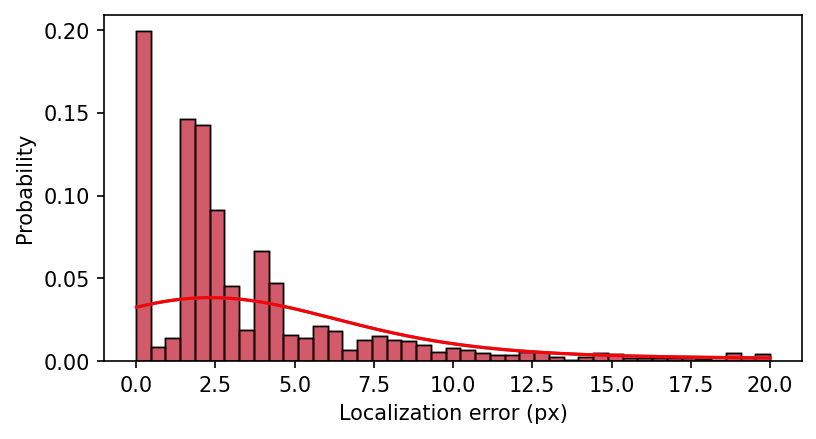

In [77]:

plt.figure(figsize=(6, 3), dpi=150, facecolor="w")

sns.histplot(metrics["dist.dists"].flatten(), binrange=(0, 20), kde=True, kde_kws={"clip": (0, 20)}, stat="probability")
sns.histplot(latest_metrics["dist.dists"].flatten(), binrange=(0, 20), kde=True, kde_kws={"clip": (0, 20)}, stat="probability", color="red")

plt.xlabel("Localization error (px)");

<AxesSubplot:ylabel='Density'>

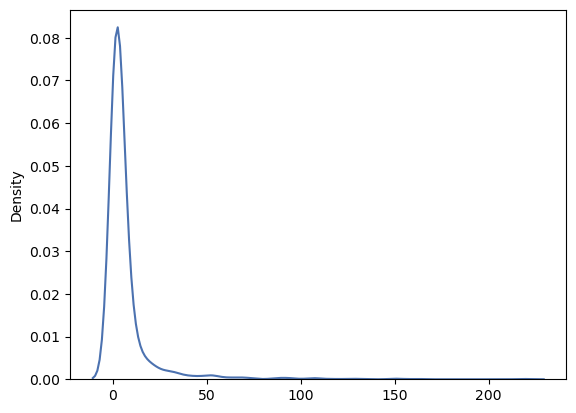

In [78]:
sns.kdeplot(all_metrics.iloc[10]["dist.dists"].flatten())

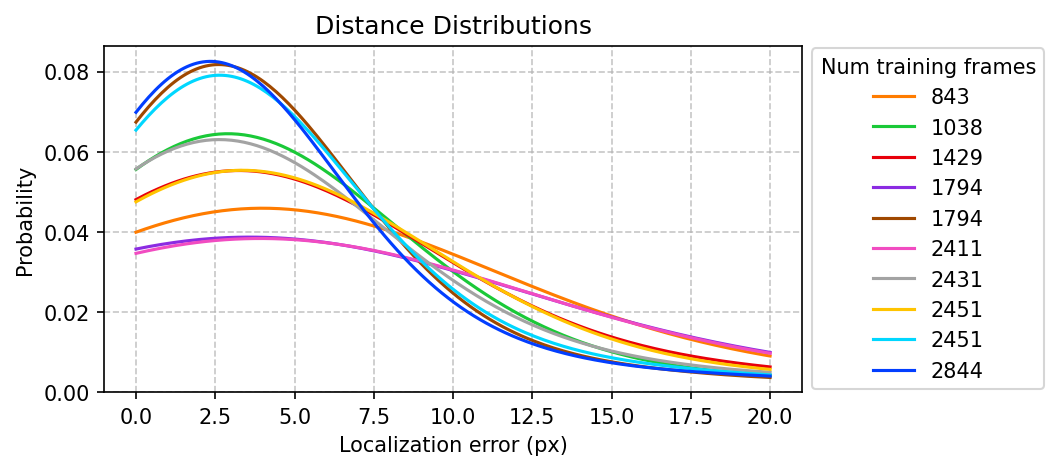

In [96]:

colormap = sns.color_palette("bright", len(all_metrics))

plt.figure(figsize=(6, 3), dpi=150, facecolor="w")


for i in range(1,11):
    # sns.histplot(all_metrics.iloc[i]["dist.dists"].flatten(), binrange=(0, 20), kde=True, kde_kws={"clip": (0, 20)}, stat="probability", color = colormap[i])
    model_name = all_metrics.iloc[i]['model_name'].split(".n=")[-1]

    sns.kdeplot(all_metrics.iloc[i]["dist.dists"].flatten(), color = colormap[i],clip=(0,20), label=model_name)
# Customize the plot
plt.xlabel("Localization error (px)")
plt.ylabel("Probability")
plt.title("Distance Distributions", fontsize=12)
plt.legend(title="Num training frames", loc='center left', bbox_to_anchor=(1,0.5))
plt.grid(True, linestyle="--", alpha=0.7)
# Show the plot
plt.show()

### Plot Object Keypoint Similarity (OKS)
- takes into account factors such as landmark visibility, animal size and difficulty locating keypoints 
- ideally range [0, 1]

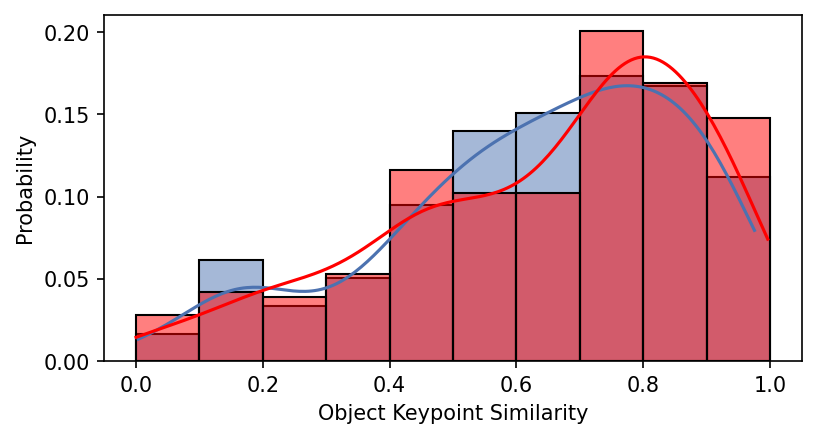

In [17]:
plt.figure(figsize=(6, 3), dpi=150, facecolor="w")
sns.histplot(metrics["oks_voc.match_scores"].flatten(), binrange=(0, 1), kde=True, kde_kws={"clip": (0, 1)}, stat="probability")
sns.histplot(latest_metrics["oks_voc.match_scores"].flatten(), binrange=(0, 1), kde=True, kde_kws={"clip": (0, 1)}, stat="probability", color="red")

plt.xlabel("Object Keypoint Similarity");

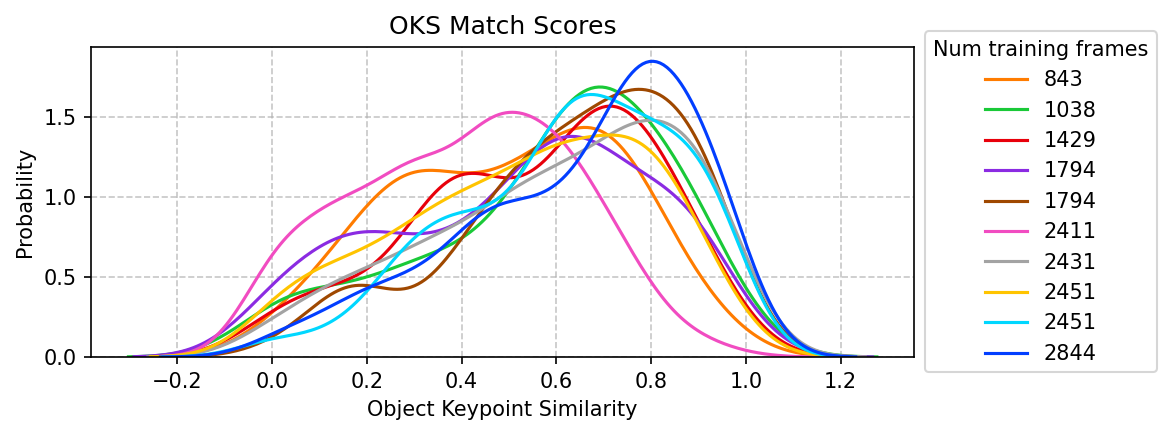

In [94]:
colormap = sns.color_palette("bright", len(all_metrics))

plt.figure(figsize=(8, 3), dpi=150, facecolor="w")


for i in range(1,11):
    # sns.histplot(all_metrics.iloc[i]["dist.dists"].flatten(), binrange=(0, 20), kde=True, kde_kws={"clip": (0, 20)}, stat="probability", color = colormap[i])
    model_name = all_metrics.iloc[i]['model_name'].split(".n=")[-1]
    sns.kdeplot(all_metrics.iloc[i]["oks_voc.match_scores"].flatten(), color = colormap[i],clip=(-5,20), label=model_name)
# Customize the plot
plt.xlabel("Object Keypoint Similarity")
plt.ylabel("Probability")
plt.title("OKS Match Scores", fontsize=12)
plt.legend(title="Num training frames", loc='center left', bbox_to_anchor=(1,0.5))
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
# Show the plot
plt.show()


### Precision-recall curves: how well does the model do at different thresholds of OKS scores
- higher the threshold, more stringent the criteria for classifying prediction as correct 

mAP: 0.34050065849239036 0.36619947479607756
mAR: 0.4033519553072626 0.4320422535211267


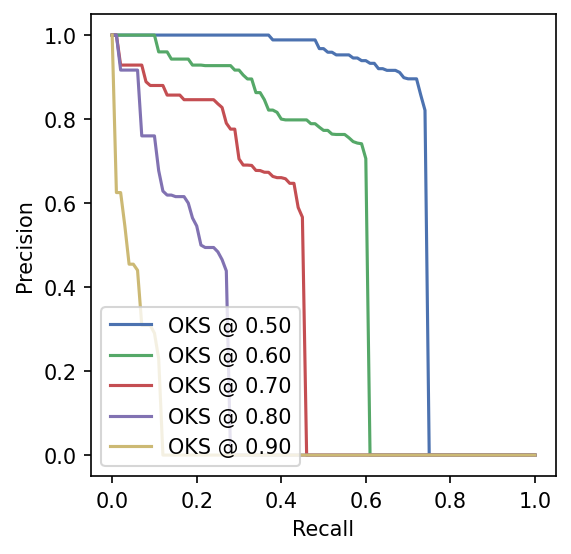

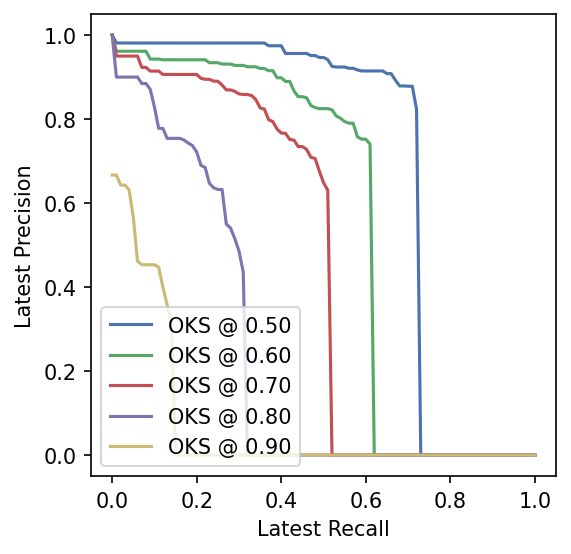

In [18]:
plt.figure(figsize=(4, 4), dpi=150, facecolor="w")
for precision, thresh in zip(metrics["oks_voc.precisions"][::2], metrics["oks_voc.match_score_thresholds"][::2]):
    plt.plot(metrics["oks_voc.recall_thresholds"], precision, "-", label=f"OKS @ {thresh:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left");

plt.figure(figsize=(4, 4), dpi=150, facecolor="w")
for precision, thresh in zip(latest_metrics["oks_voc.precisions"][::2], latest_metrics["oks_voc.match_score_thresholds"][::2]):
    plt.plot(latest_metrics["oks_voc.recall_thresholds"], precision, "-", label=f"OKS @ {thresh:.2f}")
plt.xlabel("Latest Recall")
plt.ylabel("Latest Precision")
plt.legend(loc="lower left");

# summary stats (mean Average Precision and mean Average Recall)
print("mAP:", metrics["oks_voc.mAP"], latest_metrics["oks_voc.mAP"])
print("mAR:", metrics["oks_voc.mAR"], latest_metrics["oks_voc.mAR"])


### mAP and mAR comparisons across models

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


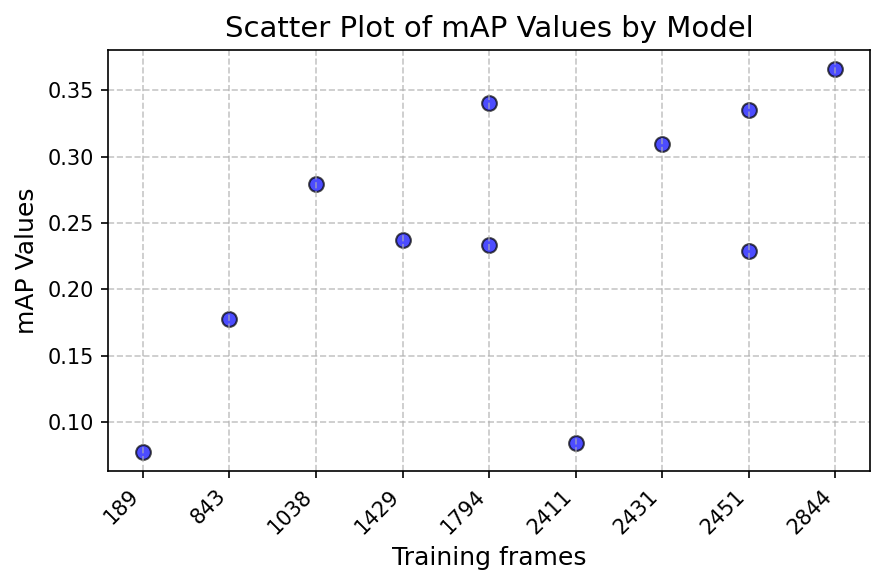

In [106]:
# Example data for all_metrics

# Extract model names (last part of the path after the last '\')
all_metrics["training_frames"] = all_metrics["model_name"].apply(lambda x: x.split(".n=")[-1])
# Create the scatter plot
plt.figure(figsize=(6, 4), dpi=150, facecolor="w")
plt.scatter(all_metrics["training_frames"], all_metrics["oks_voc.mAP"], color="blue", s=50, edgecolor="black", alpha=0.7)
# plt.scatter(all_metrics["training_frames"], all_metrics["oks_voc.mAR"], color="red", s=100, edgecolor="black", alpha=0.7)

# Customize the plot
plt.xlabel("Training frames", fontsize=12)
plt.ylabel("mAP Values", fontsize=12)
plt.title("Scatter Plot of mAP Values by Model", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
# Show values on the x-axis with a tilt for readability
plt.xticks(rotation=45, ha="right")
# Show the plot
plt.tight_layout()
plt.show()

### body parts confidence comparison

### plot across animals + across days